In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/air-passengers/AirPassengers.csv


In [2]:
# Codingan dibawah ini berfungsi untuk import library 

import pandas as pd # Untuk mengolah data
import numpy as np # Untuk mengolah angka
import matplotlib.pylab as plt # Untuk visualisasi
import seaborn as sns # Untuk Visualisasi
%matplotlib inline
from matplotlib.pylab import rcParams #Untuk visualisasi
from datetime import datetime #Untuk mengatasi tipe data tanggal
import prophet

In [3]:
# import data
df = pd.read_csv('../input/air-passengers/AirPassengers.csv')


In [4]:
#menampilkan data yang sudah di import 
df.head(5)

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
# cek data 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
# cek duplikat dara
df.duplicated().any()

False

In [7]:
# mengubah tipe data date (object) menjadi data
df['date_parsed'] = pd.to_datetime(df['Month'], format = '%Y-%m-%d')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Month        144 non-null    object        
 1   #Passengers  144 non-null    int64         
 2   date_parsed  144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


In [9]:
# Kolom yang berisi tanggal kita jadikan sebagai index
df = df.drop(['Month'], 1)
df.rename(columns = {'date_parsed' : 'Month'}, inplace= True)
df=df.set_index(['Month'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


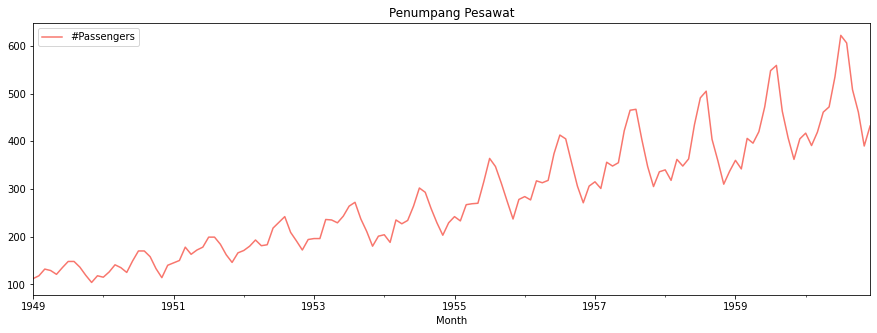

In [10]:
# Kita akan visualisasi data time-seriesnya

# Color pallete for plotting
color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#00C19F", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='-', figsize=(15,5), color=color_pal[0], title="Penumpang Pesawat")
plt.show()

In [11]:
# Membagi data kita menjadi data latih (data_train) dan data uji (data_test)

# Jika datanya kecil (ratusan jumlah datanya) pakai 0.2 
# Jika datanya sedang (ribuan jumlah datanya) pakai 0.15
# Jika datanya banyak (jutaan jumlah datanya) pakai 0.1
test_ratio = 0.2

test_set_size = int(len(df) * test_ratio)
df_train = df[0:-test_set_size].copy()
df_test = df[-test_set_size:].copy()

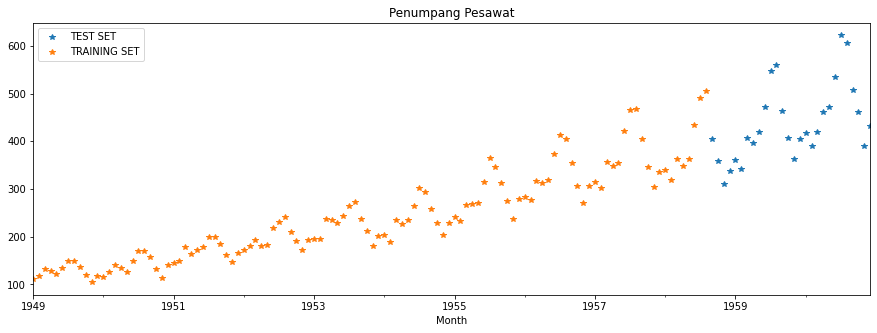

In [12]:
# Melihat hasil pembagian data kita menggunakan visualisasi
df_test \
    .rename(columns={'#Passengers': 'TEST SET'}) \
    .join(df_train.rename(columns={'#Passengers': 'TRAINING SET'}),
          how='outer') \
    .plot(figsize=(15,5), title="Penumpang Pesawat", style='*')
plt.show()

In [13]:
# Import Library yang akan digunakan untuk memprediksi Time-Series (FbProphet)

from prophet import Prophet

In [14]:
#mengembalikan kolom month ke semula sebelum jd index
df_train.reset_index(inplace= True)

In [15]:
df_train

,Month,#Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
111,1958-04-01,348
112,1958-05-01,363
113,1958-06-01,435
114,1958-07-01,491


In [16]:
# mengubah nama kolom sesuai dengan aturan library prophet
df_train.rename(columns = {'Month' : 'ds', '#Passengers' : 'y'}, inplace= True)

In [17]:
df_train

,ds,y
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121
...,...,...
111,1958-04-01,348
112,1958-05-01,363
113,1958-06-01,435
114,1958-07-01,491


In [18]:
df_test.reset_index(inplace= True)
df_test.rename(columns = {'Month' : 'ds', '#Passengers' : 'y'}, inplace= True)
df_test

,ds,y
0,1958-09-01,404
1,1958-10-01,359
2,1958-11-01,310
3,1958-12-01,337
4,1959-01-01,360
5,1959-02-01,342
6,1959-03-01,406
7,1959-04-01,396
8,1959-05-01,420
9,1959-06-01,472


In [19]:
#panggil library prophet
model = Prophet()

In [20]:
#melatih model machine learning
model.fit(df_train)

06:49:38 - cmdstanpy - INFO - Chain [1] start processing
06:49:38 - cmdstanpy - INFO - Chain [1] done processing


In [21]:
#memprediksi hasil model machine learning
hasil_prediksi = model.predict(df_test)

In [22]:
hasil_prediksi

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1958-09-01,407.830912,398.298323,443.994590,407.830873,407.830989,13.733482,13.733482,13.733482,13.733482,13.733482,13.733482,0.0,0.0,0.0,421.564394
1,1958-10-01,410.973425,366.035835,415.076439,410.951344,410.994991,-19.957543,-19.957543,-19.957543,-19.957543,-19.957543,-19.957543,0.0,0.0,0.0,391.015882
2,1958-11-01,414.220689,342.523921,388.448737,414.156864,414.276013,-49.242518,-49.242518,-49.242518,-49.242518,-49.242518,-49.242518,0.0,0.0,0.0,364.978172
3,1958-12-01,417.363203,369.080869,413.942434,417.252055,417.467145,-25.356628,-25.356628,-25.356628,-25.356628,-25.356628,-25.356628,0.0,0.0,0.0,392.006575
4,1959-01-01,420.610467,375.823710,420.924823,420.438195,420.781757,-21.547834,-21.547834,-21.547834,-21.547834,-21.547834,-21.547834,0.0,0.0,0.0,399.062633
5,1959-02-01,423.857731,372.815049,420.458488,423.614200,424.104604,-26.604196,-26.604196,-26.604196,-26.604196,-26.604196,-26.604196,0.0,0.0,0.0,397.253535
6,1959-03-01,426.790744,405.695428,451.076102,426.478632,427.099144,1.716052,1.716052,1.716052,1.716052,1.716052,1.716052,0.0,0.0,0.0,428.506796
7,1959-04-01,430.038008,399.981130,445.729135,429.643050,430.453295,-6.877089,-6.877089,-6.877089,-6.877089,-6.877089,-6.877089,0.0,0.0,0.0,423.160919
8,1959-05-01,433.180521,406.921214,452.001330,432.692612,433.682528,-4.673195,-4.673195,-4.673195,-4.673195,-4.673195,-4.673195,0.0,0.0,0.0,428.507326
9,1959-06-01,436.427785,441.069621,484.442622,435.850149,437.033418,25.797064,25.797064,25.797064,25.797064,25.797064,25.797064,0.0,0.0,0.0,462.224849


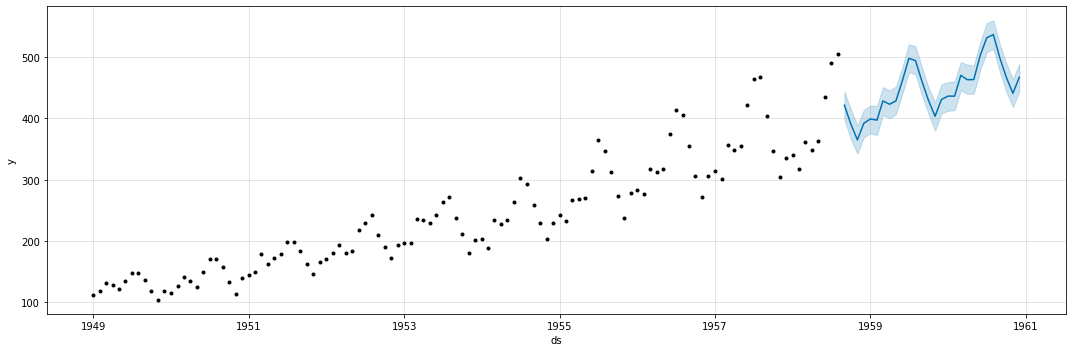

In [23]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
fig = model.plot(hasil_prediksi,ax=ax)

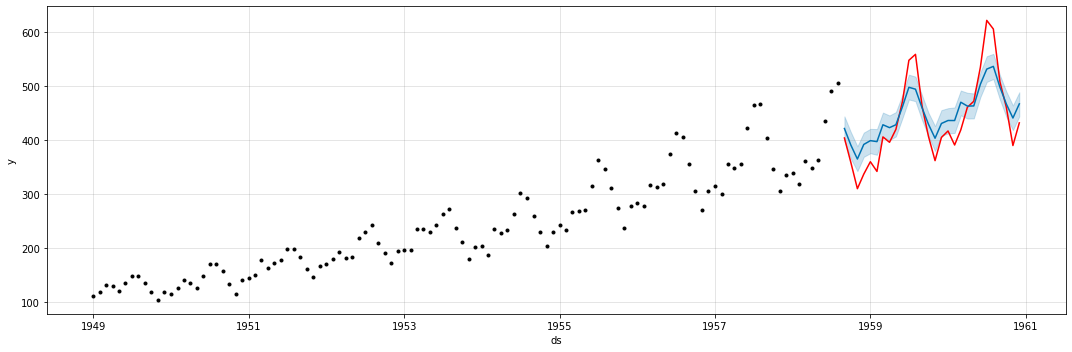

In [24]:
# Visualisasi perbandingan antara hasil prediksi machine learning dengan data yang asli
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(hasil_prediksi, ax=ax)

In [25]:
# Kita perlu ngebuat dataframe baru
prediksi_tahun_berikutnya = pd.DataFrame(columns=['ds', 'y'])

In [26]:
# masukkan tanggal untuk prediksi data baru
prediksi_tahun_berikutnya['ds'] = pd.date_range(start='1961-01-01', periods=12, freq='MS')

In [27]:
prediksi_tahun_berikutnya

,ds,y
0,1961-01-01,NaN
1,1961-02-01,NaN
2,1961-03-01,NaN
3,1961-04-01,NaN
4,1961-05-01,NaN
5,1961-06-01,NaN
6,1961-07-01,NaN
7,1961-08-01,NaN
8,1961-09-01,NaN
9,1961-10-01,NaN


In [28]:
#hasil prediksi satu tahun kedepan
hasil_prediksi_satu_tahun_kedepan = model.predict(prediksi_tahun_berikutnya)



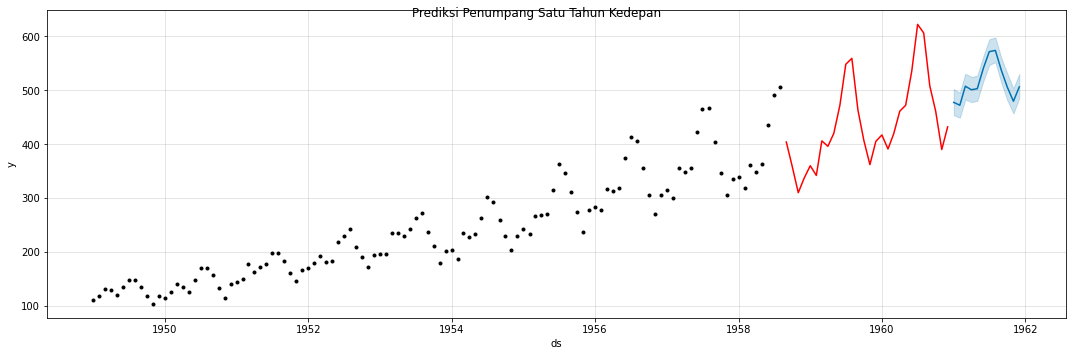

In [29]:
# Visualisai hasil prediksi machine learning

f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.plot(df_test['ds'], df_test['y'], color='r')
fig = model.plot(hasil_prediksi_satu_tahun_kedepan,
                 ax=ax)
fig = plt.suptitle("Prediksi Penumpang Satu Tahun Kedepan")
plt.show()